In [2]:
# packages
import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data
df = pd.read_csv('iris.csv')

### Inspection

In [19]:
df.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [8]:
df.shape
# 5 columns, 150 rows

(150, 5)

In [9]:
df.info()
# 1 column: variety - with categorical data
# 4 columns: sepal.length, sepal.width, petal.length, petal.width with numerica data with non-Null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# statistical summary of df
df.describe()

sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [13]:
# check for missing values
df.isnull().sum()
# no missing values

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [15]:
# check/drop duplicates
data = df.drop_duplicates(subset = "variety")
data
# only three unique varieties

sepal.length  sepal.width  petal.length  petal.width     variety
0             5.1          3.5           1.4          0.2      Setosa
50            7.0          3.2           4.7          1.4  Versicolor
100           6.3          3.3           6.0          2.5   Virginica

In [17]:
# check for balance: equal amounts of rows based on category
df.value_counts('variety')
# 50 cases per category/variety

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

### Visualization

<AxesSubplot:xlabel='variety', ylabel='count'>

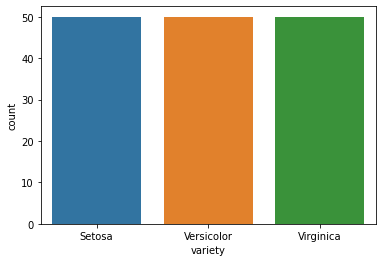

In [23]:
# visual of variety column's balance
sns.countplot(x = 'variety', data = df)
# plt.show()

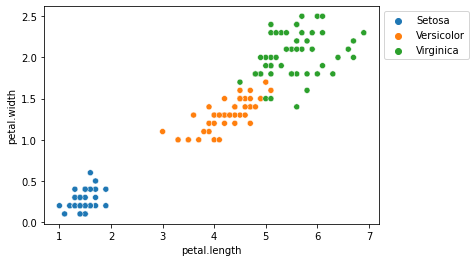

In [27]:
# variable relationships - compare petal length & petal width
sns.scatterplot(x = 'petal.length', y = 'petal.width', hue = 'variety', data = df)
# move legend box outside of the plot
plt.legend(bbox_to_anchor = (1,1), loc = 2)
# plt.show() - sometimes req. to view plot
# Virginica petals are largest in both length & width
# Setosa petals represent the smallest of the three
# Versicolor petals lie in between the other two, closer to the larger side

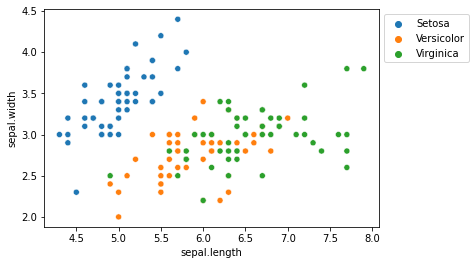

In [29]:
# compare sepal length & sepal width
sns.scatterplot(x = 'sepal.length', y = 'sepal.width', hue = 'variety', data = df)
plt.legend(bbox_to_anchor = (1,1), loc = 2)
# plt.show() - sometimes req. to view plot
# Setosa sepals have a shorter length, but tend to be wider
# Versicolor sepals lie in the middle
# Virginica sepals have more length, but smaller widths than Setosas

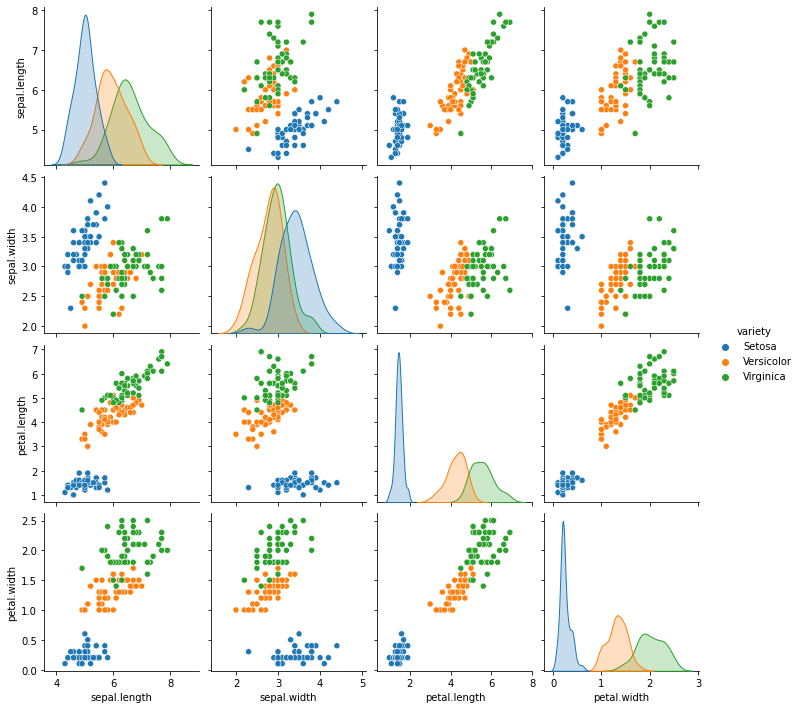

In [31]:
# pairs plot to view all column relationships - often used in multivariate analysis 
sns.pairplot(df, hue = 'variety')
# note: if id column was present sns.pairplot(df.drop(['id'], axis = 1), hue = 'variety') would be code
# Setosa is on the smaller end in sepal length, petal width & petal length, but not sepal width

(array([48.,  2., 15., 37., 25., 23.]),
 array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]),
 <BarContainer object of 6 artists>)

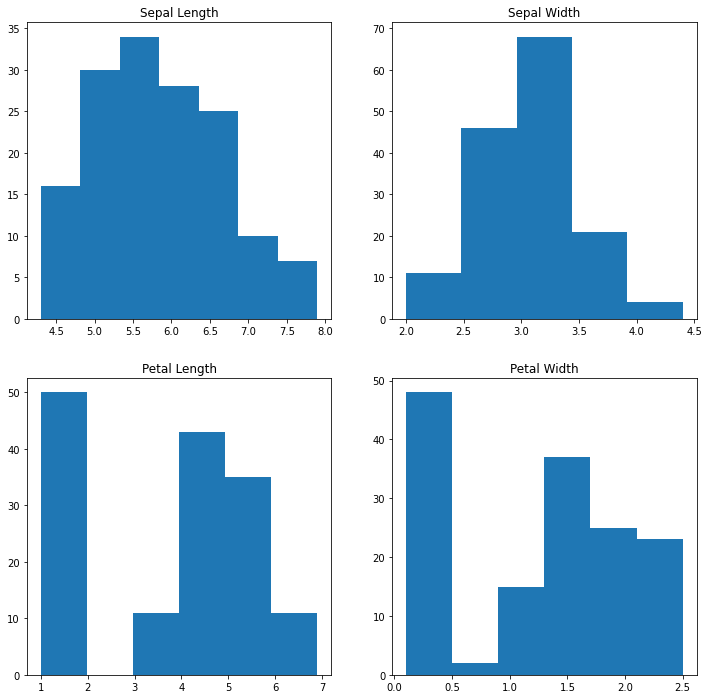

In [53]:
# histograms to view frequencies
fig, axes = plt.subplots(2, 2, figsize = (12,12))

axes[0,0].set_title('Sepal Length')
axes[0,0].hist(df['sepal.length'], bins = 7)

axes[0,1].set_title('Sepal Width')
axes[0,1].hist(df['sepal.width'], bins = 5)

axes[1,0].set_title('Petal Length')
axes[1,0].hist(df['petal.length'], bins = 6)

axes[1,1].set_title('Petal Width')
axes[1,1].hist(df['petal.width'], bins = 6)